In [656]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

In [657]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

In [658]:
food_waste = pd.read_csv("FOOD_WASTE.csv", encoding='cp949')
short_term_frgn = pd.read_csv("SHORT_TERM_FRGN.csv", encoding='cp949')

C:\Users\Jeong NeulPum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [659]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [660]:
food_waste

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110630,아라동,W6XA97,25,59800,1787
2,2018-01-01,제주시,50110630,아라동,W6XA96,8,25350,758
3,2018-01-01,제주시,50110630,아라동,W6XA95,12,30000,898
4,2018-01-01,제주시,50110630,아라동,W6XA94,14,44050,1317
...,...,...,...,...,...,...,...,...
2211440,2021-06-30,제주시,50110250,한림읍,W6XEB4,12,58250,1743
2211441,2021-06-30,제주시,50110250,한림읍,W6XEB7,15,111000,3326
2211442,2021-06-30,제주시,50110250,한림읍,W6XEB8,21,48300,1444
2211443,2021-06-30,제주시,50110250,한림읍,W6XEA2,5,22050,661


In [661]:
food_waste['base_date'] = pd.to_datetime(food_waste['base_date'])

In [662]:
food_waste['year'] = food_waste['base_date'].dt.year

In [663]:
food_waste['month'] = food_waste['base_date'].dt.month

In [664]:
foodwaste = food_waste.groupby(['year','month', 'emd_nm'])['em_g'].sum().reset_index()

In [665]:
foodwaste

,year,month,emd_nm,em_g
0,2018,1,건입동,45646550
1,2018,1,남원읍,42437700
2,2018,1,노형동,265018400
3,2018,1,대륜동,57612600
4,2018,1,대정읍,38885550
...,...,...,...,...
1661,2021,6,표선면,42453750
1662,2021,6,한경면,27060150
1663,2021,6,한림읍,82746990
1664,2021,6,화북동,110750050


<AxesSubplot:ylabel='Frequency'>

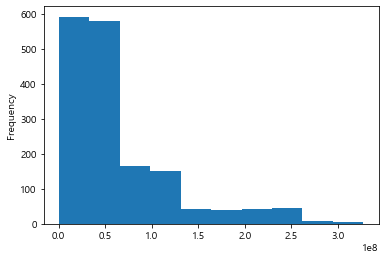

In [666]:
foodwaste['em_g'].plot.hist()

In [667]:
foodwaste['em_g'].describe()

count    1.666000e+03
mean     6.372561e+07
std      5.898525e+07
min      3.376000e+05
25%      2.312361e+07
50%      4.515420e+07
75%      8.112998e+07
max      3.274838e+08
Name: em_g, dtype: float64

In [510]:
df_boxcox = pd.Series(stats.boxcox(foodwaste['em_g'])[0])

In [135]:
print(df_boxcox.skew()) # box-cox 변환의 왜도는 0.018로 매우 낮음 => 그러나 나중에 해석할 때 힘들것같아서 로그변환으로 하겠음

0.018236526781358748


<AxesSubplot:ylabel='Frequency'>

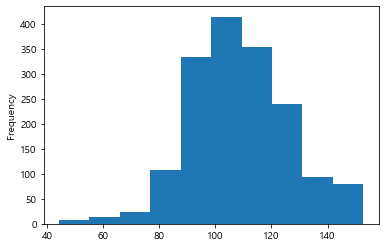

In [511]:
df_boxcox.plot.hist()

In [512]:
df_log = np.log(foodwaste['em_g'])

In [513]:
print(df_log.skew())

-0.6338405812354946


<AxesSubplot:ylabel='Frequency'>

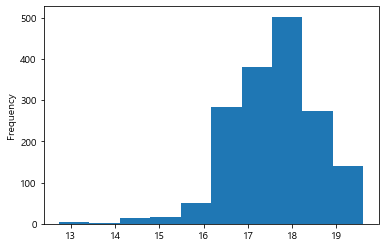

In [514]:
df_log.plot.hist()

In [668]:
foodwaste['em_g'] = np.log(foodwaste['em_g']) # 일단은 로그변환 이용

<AxesSubplot:ylabel='Frequency'>

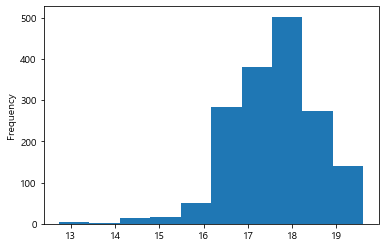

In [669]:
foodwaste['em_g'].plot.hist()

<AxesSubplot:ylabel='em_g'>

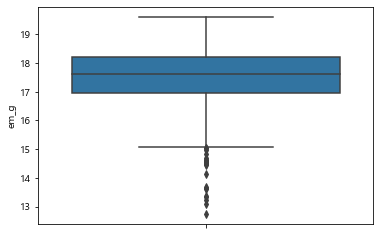

In [517]:
sns.boxplot(y='em_g',data=foodwaste)

In [670]:
scaler = StandardScaler()
foodwaste['em_g'] = scaler.fit_transform(foodwaste[['em_g']])

In [671]:
foodwaste

,year,month,emd_nm,em_g
0,2018,1,건입동,0.064537
1,2018,1,남원읍,-0.011915
2,2018,1,노형동,1.909326
3,2018,1,대륜동,0.308722
4,2018,1,대정읍,-0.103599
...,...,...,...,...
1661,2021,6,표선면,-0.011518
1662,2021,6,한경면,-0.483871
1663,2021,6,한림읍,0.688454
1664,2021,6,화북동,0.994181


In [764]:
foodwaste.to_csv("foodwaste_final.csv")

In [113]:
# foodwaste[foodwaste['em_g'] >= 3.29].shape 이상치 제거하려 했으나 행의 개수가 달라지므로 일단 생략

(0, 4)

In [114]:
# foodwaste[foodwaste['em_g'] <= -3.29].shape

(9, 4)

In [115]:
# foodwaste = foodwaste[(foodwaste['em_g'] < 3.29) & (foodwaste['em_g'] > -3.29)]

In [117]:
# foodwaste[foodwaste['em_g'] <= -3.29].shape

(0, 4)

In [672]:
short_term_frgn

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078
...,...,...,...,...,...,...,...
6059039,2021-06-30,24,USA,서귀포시,50130610,중문동,9.2120
6059040,2021-06-30,24,CHN,서귀포시,50130610,중문동,0.6039
6059041,2021-06-30,24,ETC,서귀포시,50130610,중문동,11.5473
6059042,2021-06-30,24,CHN,서귀포시,50130620,예래동,0.2013


In [673]:
short_term_frgn['base_date'] = pd.to_datetime(short_term_frgn['base_date'])
short_term_frgn['year'] = short_term_frgn['base_date'].dt.year
short_term_frgn['month'] = short_term_frgn['base_date'].dt.month

In [674]:
short_term_frgn

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt,year,month
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170,2018,1
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308,2018,1
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771,2018,1
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962,2018,1
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078,2018,1
...,...,...,...,...,...,...,...,...,...
6059039,2021-06-30,24,USA,서귀포시,50130610,중문동,9.2120,2021,6
6059040,2021-06-30,24,CHN,서귀포시,50130610,중문동,0.6039,2021,6
6059041,2021-06-30,24,ETC,서귀포시,50130610,중문동,11.5473,2021,6
6059042,2021-06-30,24,CHN,서귀포시,50130620,예래동,0.2013,2021,6


In [ ]:
#def test_time(x):
        #if x<=6 : return '새벽'
        #elif x<=12 : return '오전'
        #elif x<=18 : return '오후'
        #else: return '저녁'

In [434]:
# short_term_frgn['time'] = short_term_frgn['time'].apply(test_time)

In [435]:
# short_term_frgn

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt,year,month
0,2018-01-01,새벽,CHN,제주시,50110250,한림읍,66.3170,2018,1
1,2018-01-01,새벽,ETC,제주시,50110250,한림읍,21.1308,2018,1
2,2018-01-01,새벽,HKG,제주시,50110250,한림읍,3.6771,2018,1
3,2018-01-01,새벽,JPN,제주시,50110250,한림읍,5.5962,2018,1
4,2018-01-01,새벽,USA,제주시,50110250,한림읍,3.9078,2018,1
...,...,...,...,...,...,...,...,...,...
6059039,2021-06-30,저녁,USA,서귀포시,50130610,중문동,9.2120,2021,6
6059040,2021-06-30,저녁,CHN,서귀포시,50130610,중문동,0.6039,2021,6
6059041,2021-06-30,저녁,ETC,서귀포시,50130610,중문동,11.5473,2021,6
6059042,2021-06-30,저녁,CHN,서귀포시,50130620,예래동,0.2013,2021,6


In [436]:
#change_nationality={'AUS' : '오세아니아', 'BGD': '아시아', 'CAN' : '북아메리카', 'CHN' : '아시아', 'DEU' : '유럽', 'EGY' : '아프리카', 'ETC' : '기타', 'FRA' : '유럽','GBR' : '유럽','IDN' : '아시아','IND' : '아시아' , 'JPN' : '아시아' ,'KAZ' : '아시아' 
#,'KGZ' : '아시아' 
#,'KHM' : '아시아' 
#,'LKA' : '아시아' 
#,'MGL' : '아시아' 
#,'MMR' : '아시아' 
#,'MYS' : '아시아' 
#,'NGR' : '아프리카'
#,'NPL' : '아시아' 
#,'NZL' : '오세아니아'
#,'PAK' : '아시아'
#,'PHL' : '아시아'
#,'RUS' : '유럽'
#,'THA' : '아시아' 
# ,'TWN' : '아시아'
# ,'UKR' : '유럽' 
# ,'USA' : '북아메리카'
# ,'UZB' : '아시아'
# ,'VNM' : '아시아'
# ,'HKG' : '아시아'
# ,'SGP' : '아시아'}

In [437]:
#short_term_frgn=short_term_frgn.replace({'nationality' : change_nationality})

In [803]:
shorttermfrgn_time = short_term_frgn.groupby(['year','month', 'emd_nm', 'time'])['visit_pop_cnt'].sum().reset_index()
shorttermfrgn_nation = short_term_frgn.groupby(['year','month', 'emd_nm', 'nationality'])['visit_pop_cnt'].sum().reset_index()

In [745]:
shorttermfrgn_time

,year,month,emd_nm,time,visit_pop_cnt
0,2018,1,건입동,1,3673.9936
1,2018,1,건입동,2,3542.3599
2,2018,1,건입동,3,3436.6785
3,2018,1,건입동,4,3371.4627
4,2018,1,건입동,5,3337.3577
...,...,...,...,...,...
43339,2021,6,효돈동,20,9.1389
43340,2021,6,효돈동,21,7.5475
43341,2021,6,효돈동,22,7.7318
43342,2021,6,효돈동,23,7.9238


In [746]:
shorttermfrgn_nation

,year,month,emd_nm,nationality,visit_pop_cnt
0,2018,1,건입동,CHN,30589.4398
1,2018,1,건입동,ETC,6180.7434
2,2018,1,건입동,HKG,3338.7747
3,2018,1,건입동,IDN,5750.0000
4,2018,1,건입동,JPN,7711.5516
...,...,...,...,...,...
16250,2021,6,효돈동,IDN,1.1669
16251,2021,6,효돈동,MYS,0.9326
16252,2021,6,효돈동,THA,2.5344
16253,2021,6,효돈동,USA,6.4484


In [815]:
#시각 더미변수화
shorttermfrgn_time = pd.get_dummies(shorttermfrgn_time, columns=['time'])

In [816]:
shorttermfrgn_time

,year,month,emd_nm,visit_pop_cnt,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23,time_24
0,2018,1,건입동,3673.9936,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2018,1,건입동,3542.3599,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2018,1,건입동,3436.6785,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2018,1,건입동,3371.4627,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2018,1,건입동,3337.3577,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43339,2021,6,효돈동,9.1389,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
43340,2021,6,효돈동,7.5475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
43341,2021,6,효돈동,7.7318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
43342,2021,6,효돈동,7.9238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [817]:
shorttermfrgn_time['1시_visit_pop_cnt'] = shorttermfrgn_time['time_1']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['2시_visit_pop_cnt'] = shorttermfrgn_time['time_2']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['3시_visit_pop_cnt'] = shorttermfrgn_time['time_3']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['4시_visit_pop_cnt'] = shorttermfrgn_time['time_4']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['5시_visit_pop_cnt'] = shorttermfrgn_time['time_5']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['6시_visit_pop_cnt'] = shorttermfrgn_time['time_6']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['7시_visit_pop_cnt'] = shorttermfrgn_time['time_7']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['8시_visit_pop_cnt'] = shorttermfrgn_time['time_8']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['9시_visit_pop_cnt'] = shorttermfrgn_time['time_9']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['10시_visit_pop_cnt'] = shorttermfrgn_time['time_10']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['11시_visit_pop_cnt'] = shorttermfrgn_time['time_11']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['12시_visit_pop_cnt'] = shorttermfrgn_time['time_12']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['13시_visit_pop_cnt'] = shorttermfrgn_time['time_13']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['14시_visit_pop_cnt'] = shorttermfrgn_time['time_14']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['15시_visit_pop_cnt'] = shorttermfrgn_time['time_15']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['16시_visit_pop_cnt'] = shorttermfrgn_time['time_16']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['17시_visit_pop_cnt'] = shorttermfrgn_time['time_17']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['18시_visit_pop_cnt'] = shorttermfrgn_time['time_18']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['19시_visit_pop_cnt'] = shorttermfrgn_time['time_19']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['20시_visit_pop_cnt'] = shorttermfrgn_time['time_20']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['21시_visit_pop_cnt'] = shorttermfrgn_time['time_21']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['22시_visit_pop_cnt'] = shorttermfrgn_time['time_22']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['23시_visit_pop_cnt'] = shorttermfrgn_time['time_23']*shorttermfrgn_time['visit_pop_cnt']
shorttermfrgn_time['24시_visit_pop_cnt'] = shorttermfrgn_time['time_24']*shorttermfrgn_time['visit_pop_cnt']

In [818]:
shorttermfrgn_time

,year,month,emd_nm,visit_pop_cnt,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23,time_24,1시_visit_pop_cnt,2시_visit_pop_cnt,3시_visit_pop_cnt,4시_visit_pop_cnt,5시_visit_pop_cnt,6시_visit_pop_cnt,7시_visit_pop_cnt,8시_visit_pop_cnt,9시_visit_pop_cnt,10시_visit_pop_cnt,11시_visit_pop_cnt,12시_visit_pop_cnt,13시_visit_pop_cnt,14시_visit_pop_cnt,15시_visit_pop_cnt,16시_visit_pop_cnt,17시_visit_pop_cnt,18시_visit_pop_cnt,19시_visit_pop_cnt,20시_visit_pop_cnt,21시_visit_pop_cnt,22시_visit_pop_cnt,23시_visit_pop_cnt,24시_visit_pop_cnt
0,2018,1,건입동,3673.9936,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3673.9936,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
1,2018,1,건입동,3542.3599,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,3542.3599,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
2,2018,1,건입동,3436.6785,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,3436.6785,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
3,2018,1,건입동,3371.4627,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,3371.4627,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
4,2018,1,건입동,3337.3577,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,3337.3577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43339,2021,6,효돈동,9.1389,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.1389,0.0000,0.0000,0.0000,0.0000
43340,2021,6,효돈동,7.5475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,7.5475,0.0000,0.0000,0.0000
43341,2021,6,효돈동,7.7318,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,7.7318,0.0000,0.0000
43342,2021,6,효돈동,7.9238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,7.9238,0.0000


In [819]:
shorttermfrgn_time = shorttermfrgn_time.groupby(['year','month','emd_nm'])['1시_visit_pop_cnt','2시_visit_pop_cnt','3시_visit_pop_cnt','4시_visit_pop_cnt','5시_visit_pop_cnt','6시_visit_pop_cnt','7시_visit_pop_cnt','8시_visit_pop_cnt','9시_visit_pop_cnt','10시_visit_pop_cnt','11시_visit_pop_cnt','12시_visit_pop_cnt','13시_visit_pop_cnt','14시_visit_pop_cnt','15시_visit_pop_cnt','16시_visit_pop_cnt','17시_visit_pop_cnt','18시_visit_pop_cnt','19시_visit_pop_cnt','20시_visit_pop_cnt','21시_visit_pop_cnt','22시_visit_pop_cnt','23시_visit_pop_cnt','24시_visit_pop_cnt'].sum().reset_index()

<ipython-input-819-834f52400d69>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  shorttermfrgn_time = shorttermfrgn_time.groupby(['year','month','emd_nm'])['1시_visit_pop_cnt','2시_visit_pop_cnt','3시_visit_pop_cnt','4시_visit_pop_cnt','5시_visit_pop_cnt','6시_visit_pop_cnt','7시_visit_pop_cnt','8시_visit_pop_cnt','9시_visit_pop_cnt','10시_visit_pop_cnt','11시_visit_pop_cnt','12시_visit_pop_cnt','13시_visit_pop_cnt','14시_visit_pop_cnt','15시_visit_pop_cnt','16시_visit_pop_cnt','17시_visit_pop_cnt','18시_visit_pop_cnt','19시_visit_pop_cnt','20시_visit_pop_cnt','21시_visit_pop_cnt','22시_visit_pop_cnt','23시_visit_pop_cnt','24시_visit_pop_cnt'].sum().reset_index()


In [820]:
shorttermfrgn_time

,year,month,emd_nm,1시_visit_pop_cnt,2시_visit_pop_cnt,3시_visit_pop_cnt,4시_visit_pop_cnt,5시_visit_pop_cnt,6시_visit_pop_cnt,7시_visit_pop_cnt,8시_visit_pop_cnt,9시_visit_pop_cnt,10시_visit_pop_cnt,11시_visit_pop_cnt,12시_visit_pop_cnt,13시_visit_pop_cnt,14시_visit_pop_cnt,15시_visit_pop_cnt,16시_visit_pop_cnt,17시_visit_pop_cnt,18시_visit_pop_cnt,19시_visit_pop_cnt,20시_visit_pop_cnt,21시_visit_pop_cnt,22시_visit_pop_cnt,23시_visit_pop_cnt,24시_visit_pop_cnt
0,2018,1,건입동,3673.9936,3542.3599,3436.6785,3371.4627,3337.3577,3240.7886,3252.6924,3360.0672,3307.9887,2821.0880,2450.8400,2211.2991,2148.7603,2398.4878,2518.8777,2744.7515,3431.1131,3697.6338,3623.3463,4013.3122,4013.8787,3921.6567,3832.1361,3872.5090
1,2018,1,구좌읍,1727.9213,1726.0157,1725.0861,1717.1234,1713.5042,1725.0474,1733.6975,1752.6790,2021.8704,2661.5598,2865.9285,2396.0256,2032.6151,1929.9337,2008.5059,1996.1006,2024.4635,1998.7563,1826.9654,1742.4379,1826.7594,1804.4655,1823.7910,1783.4982
2,2018,1,남원읍,10148.3040,10072.4872,10087.9377,10084.2029,10107.0298,10200.9413,10722.4985,10818.7199,11075.6866,11480.1566,11152.7891,11069.2063,11037.5806,10934.9809,10818.5081,11330.1373,11300.5563,11263.1749,10835.7439,10329.6656,10241.8831,10176.2193,10202.8313,10073.9187
3,2018,1,노형동,9188.0096,9452.0026,9570.4793,9566.2575,9457.6667,9372.8083,9385.0298,9385.9658,9393.4667,9192.8596,7554.6888,6942.6185,7333.9799,6803.8297,6790.4825,7016.0953,6821.0907,7632.0137,8258.8279,8217.8191,7774.7790,7781.2876,8242.0575,8423.8239
4,2018,1,대륜동,1853.5973,1875.3239,1874.3958,1871.2777,1870.0580,1889.2504,1957.2221,1975.4838,1897.7590,1819.3935,1810.8393,1670.0536,1561.2637,1618.7177,1572.9915,1553.2970,1646.9047,1681.9052,1707.5051,1764.0759,1787.4723,1835.7997,1888.5045,1843.7846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021,6,표선면,102.1623,103.3293,108.0186,112.1757,136.4852,119.4135,138.2990,118.5430,108.7414,106.6860,109.6036,103.2286,106.9419,108.7669,103.1550,105.0101,98.4044,94.2797,94.2033,91.8181,94.4218,102.5951,109.3994,103.2889
1802,2021,6,한경면,29.7481,31.0610,32.6564,29.4936,28.3344,26.7298,33.1219,33.9128,32.0477,31.2194,30.7082,32.0974,33.9377,34.3887,32.1726,35.4857,31.7299,31.4080,30.3393,29.5127,29.9113,29.1540,27.9169,26.5595
1803,2021,6,한림읍,67.8352,67.4497,67.2401,66.6115,66.7952,66.9618,66.9273,68.0441,68.8446,71.7069,78.5269,80.5126,77.4468,81.6268,81.3521,81.5210,82.8475,81.4841,79.7163,75.8499,74.1029,74.5969,68.6422,65.1648
1804,2021,6,화북동,12.5519,12.0333,12.6939,12.6939,11.7727,11.7727,11.5714,11.7727,12.3766,14.6216,12.9805,14.8229,14.5649,15.4861,14.8822,15.8200,13.7763,14.4796,17.2458,14.9415,13.5584,13.1558,12.7532,12.5519


In [800]:
#shorttermfrgn_time.to_csv("shorttermfrgn_time.csv")

<AxesSubplot:>

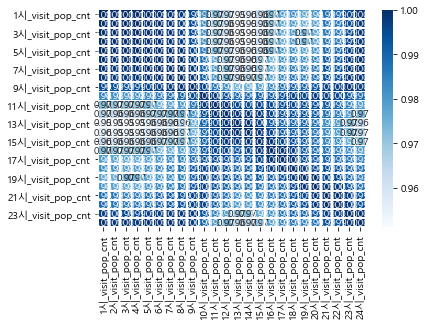

In [755]:
sns.heatmap(data=shorttermfrgn_time.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [ ]:
# 시각별로 나눌 때 상관계수가 아무리 작아도 0.96 => 시각별로 유의미한 차이를 보이지 않는다.
# 9시 시각을 변수로 쓰겠음!

In [804]:
# 국가 더미변수화
shorttermfrgn_nation = pd.get_dummies(shorttermfrgn_nation, columns=['nationality'])

In [805]:
shorttermfrgn_nation

,year,month,emd_nm,visit_pop_cnt,nationality_CHN,nationality_ETC,nationality_HKG,nationality_IDN,nationality_JPN,nationality_MYS,nationality_SGP,nationality_THA,nationality_USA,nationality_VNM
0,2018,1,건입동,30589.4398,1,0,0,0,0,0,0,0,0,0
1,2018,1,건입동,6180.7434,0,1,0,0,0,0,0,0,0,0
2,2018,1,건입동,3338.7747,0,0,1,0,0,0,0,0,0,0
3,2018,1,건입동,5750.0000,0,0,0,1,0,0,0,0,0,0
4,2018,1,건입동,7711.5516,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16250,2021,6,효돈동,1.1669,0,0,0,1,0,0,0,0,0,0
16251,2021,6,효돈동,0.9326,0,0,0,0,0,1,0,0,0,0
16252,2021,6,효돈동,2.5344,0,0,0,0,0,0,0,1,0,0
16253,2021,6,효돈동,6.4484,0,0,0,0,0,0,0,0,1,0


In [806]:
shorttermfrgn_nation['CHN_visit_pop_cnt'] = shorttermfrgn_nation['nationality_CHN']*shorttermfrgn_nation['visit_pop_cnt']
shorttermfrgn_nation['ETC_visit_pop_cnt'] = shorttermfrgn_nation['nationality_ETC']*shorttermfrgn_nation['visit_pop_cnt']
shorttermfrgn_nation['HKG_visit_pop_cnt'] = shorttermfrgn_nation['nationality_HKG']*shorttermfrgn_nation['visit_pop_cnt']
shorttermfrgn_nation['IDN_visit_pop_cnt'] = shorttermfrgn_nation['nationality_IDN']*shorttermfrgn_nation['visit_pop_cnt']
shorttermfrgn_nation['JPN_visit_pop_cnt'] = shorttermfrgn_nation['nationality_JPN']*shorttermfrgn_nation['visit_pop_cnt']
shorttermfrgn_nation['MYS_visit_pop_cnt'] = shorttermfrgn_nation['nationality_MYS']*shorttermfrgn_nation['visit_pop_cnt']
shorttermfrgn_nation['SGP_visit_pop_cnt'] = shorttermfrgn_nation['nationality_SGP']*shorttermfrgn_nation['visit_pop_cnt']
shorttermfrgn_nation['THA_visit_pop_cnt'] = shorttermfrgn_nation['nationality_THA']*shorttermfrgn_nation['visit_pop_cnt']
shorttermfrgn_nation['USA_visit_pop_cnt'] = shorttermfrgn_nation['nationality_USA']*shorttermfrgn_nation['visit_pop_cnt']
shorttermfrgn_nation['VNM_visit_pop_cnt'] = shorttermfrgn_nation['nationality_VNM']*shorttermfrgn_nation['visit_pop_cnt']

In [807]:
shorttermfrgn_nation

,year,month,emd_nm,visit_pop_cnt,nationality_CHN,nationality_ETC,nationality_HKG,nationality_IDN,nationality_JPN,nationality_MYS,nationality_SGP,nationality_THA,nationality_USA,nationality_VNM,CHN_visit_pop_cnt,ETC_visit_pop_cnt,HKG_visit_pop_cnt,IDN_visit_pop_cnt,JPN_visit_pop_cnt,MYS_visit_pop_cnt,SGP_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,VNM_visit_pop_cnt
0,2018,1,건입동,30589.4398,1,0,0,0,0,0,0,0,0,0,30589.4398,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1,2018,1,건입동,6180.7434,0,1,0,0,0,0,0,0,0,0,0.0000,6180.7434,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
2,2018,1,건입동,3338.7747,0,0,1,0,0,0,0,0,0,0,0.0000,0.0000,3338.7747,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
3,2018,1,건입동,5750.0000,0,0,0,1,0,0,0,0,0,0,0.0000,0.0000,0.0000,5750.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
4,2018,1,건입동,7711.5516,0,0,0,0,1,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,7711.5516,0.0000,0.0,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16250,2021,6,효돈동,1.1669,0,0,0,1,0,0,0,0,0,0,0.0000,0.0000,0.0000,1.1669,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
16251,2021,6,효돈동,0.9326,0,0,0,0,0,1,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.9326,0.0,0.0000,0.0000,0.0000
16252,2021,6,효돈동,2.5344,0,0,0,0,0,0,0,1,0,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,2.5344,0.0000,0.0000
16253,2021,6,효돈동,6.4484,0,0,0,0,0,0,0,0,1,0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,6.4484,0.0000


In [808]:
shorttermfrgn_nation = shorttermfrgn_nation.groupby(['year','month','emd_nm'])['CHN_visit_pop_cnt','ETC_visit_pop_cnt','HKG_visit_pop_cnt','IDN_visit_pop_cnt','JPN_visit_pop_cnt','MYS_visit_pop_cnt','SGP_visit_pop_cnt','THA_visit_pop_cnt','USA_visit_pop_cnt','VNM_visit_pop_cnt'].sum().reset_index()

<ipython-input-808-f95f111208bc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  shorttermfrgn_nation = shorttermfrgn_nation.groupby(['year','month','emd_nm'])['CHN_visit_pop_cnt','ETC_visit_pop_cnt','HKG_visit_pop_cnt','IDN_visit_pop_cnt','JPN_visit_pop_cnt','MYS_visit_pop_cnt','SGP_visit_pop_cnt','THA_visit_pop_cnt','USA_visit_pop_cnt','VNM_visit_pop_cnt'].sum().reset_index()


In [809]:
shorttermfrgn_nation

,year,month,emd_nm,CHN_visit_pop_cnt,ETC_visit_pop_cnt,HKG_visit_pop_cnt,IDN_visit_pop_cnt,JPN_visit_pop_cnt,MYS_visit_pop_cnt,SGP_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,VNM_visit_pop_cnt
0,2018,1,건입동,30589.4398,6180.7434,3338.7747,5750.0000,7711.5516,10864.9015,5572.0536,4151.8176,996.4937,3067.3037
1,2018,1,구좌읍,26691.1513,3145.8307,555.2396,2081.5000,2059.4006,4084.9522,1326.6745,5113.5373,1506.4652,0.0000
2,2018,1,남원읍,179846.0273,46968.4649,3438.0588,2277.0000,4588.8809,5378.3968,2558.3085,3670.9579,2840.9947,3998.0701
3,2018,1,노형동,145583.1902,16283.9036,4434.5390,3358.0000,7442.9342,12768.3868,2083.0803,4151.8177,2204.0138,1248.0744
4,2018,1,대륜동,22743.8459,5042.3172,1058.9998,2081.5000,2367.1926,7332.0764,1112.8216,328.3924,738.5766,21.1538
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021,6,표선면,564.6092,1231.4099,3.7154,10.6686,0.0000,34.0399,0.0000,21.5088,703.7967,9.2223
1802,2021,6,한경면,304.7563,307.1627,0.5478,23.1712,3.1818,28.4435,0.0000,9.0817,56.1932,11.1088
1803,2021,6,한림읍,786.2225,746.8902,0.3984,43.8421,0.0000,35.4384,0.0000,0.3168,140.9436,7.7552
1804,2021,6,화북동,158.4231,52.1947,0.0332,0.0000,0.0000,0.0000,0.0000,0.0000,114.2288,0.0000


In [801]:
#shorttermfrgn_nation.to_csv("shorttermfrgn_nation.csv")

<AxesSubplot:>

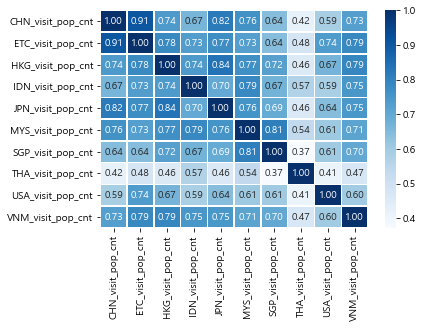

In [810]:
sns.heatmap(data=shorttermfrgn_nation.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [811]:
shorttermfrgn_nation['ETC_visit_pop_cnt']=shorttermfrgn_nation['CHN_visit_pop_cnt']+shorttermfrgn_nation['ETC_visit_pop_cnt']+shorttermfrgn_nation['HKG_visit_pop_cnt']+shorttermfrgn_nation['IDN_visit_pop_cnt']+shorttermfrgn_nation['JPN_visit_pop_cnt']+shorttermfrgn_nation['MYS_visit_pop_cnt']+shorttermfrgn_nation['SGP_visit_pop_cnt']+shorttermfrgn_nation['VNM_visit_pop_cnt']+shorttermfrgn_nation['USA_visit_pop_cnt']

In [812]:
shorttermfrgn_nation = shorttermfrgn_nation.loc[:,['year','month','emd_nm','ETC_visit_pop_cnt','THA_visit_pop_cnt']]

In [813]:
shorttermfrgn_nation

,year,month,emd_nm,ETC_visit_pop_cnt,THA_visit_pop_cnt
0,2018,1,건입동,74071.2620,4151.8176
1,2018,1,구좌읍,41451.2141,5113.5373
2,2018,1,남원읍,251894.2020,3670.9579
3,2018,1,노형동,195406.1223,4151.8177
4,2018,1,대륜동,42498.4839,328.3924
...,...,...,...,...,...
1801,2021,6,표선면,2557.4620,21.5088
1802,2021,6,한경면,734.5653,9.0817
1803,2021,6,한림읍,1761.4904,0.3168
1804,2021,6,화북동,324.8798,0.0000


In [821]:
shorttermfrgn_nation['9시_visit_pop_cnt']=shorttermfrgn_time['9시_visit_pop_cnt']

In [822]:
shorttermfrgn_final=shorttermfrgn_nation

<AxesSubplot:>

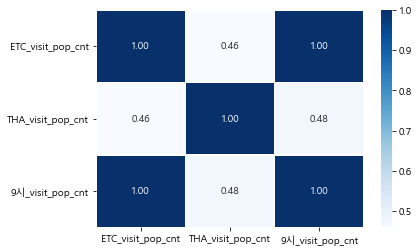

In [823]:
sns.heatmap(data=shorttermfrgn_final.drop(['year', 'month', 'emd_nm'], axis=1).corr(), cmap="Blues", annot=True, fmt='.2f', linewidths=.5)

In [826]:
shorttermfrgn_submit = shorttermfrgn_final.drop('9시_visit_pop_cnt', axis=1)

In [833]:
shorttermfrgn_submit.to_csv("shorttermfrgn_submit.csv", encoding='cp949', index=None)

<AxesSubplot:ylabel='Frequency'>

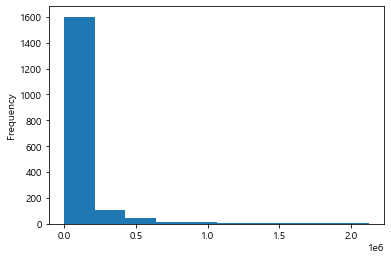

In [700]:
shorttermfrgn_final['ETC_visit_pop_cnt'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

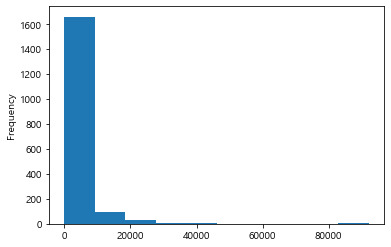

In [701]:
shorttermfrgn_final['THA_visit_pop_cnt'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

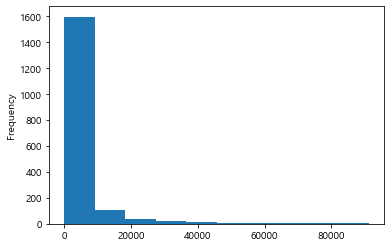

In [703]:
shorttermfrgn_final['9시_visit_pop_cnt'].plot.hist()

In [708]:
shorttermfrgn_final['ETC_visit_pop_cnt'].describe()

count    1.806000e+03
mean     1.008930e+05
std      2.395808e+05
min      6.097200e+00
25%      1.763814e+03
50%      2.639618e+04
75%      8.077719e+04
max      2.126195e+06
Name: ETC_visit_pop_cnt, dtype: float64

In [709]:
shorttermfrgn_final['THA_visit_pop_cnt'].describe() # 0값 존재

count     1806.000000
mean      2741.873592
std       6900.687795
min          0.000000
25%          8.453825
50%        316.033600
75%       2253.181375
max      92161.299200
Name: THA_visit_pop_cnt, dtype: float64

In [711]:
shorttermfrgn_final['9시_visit_pop_cnt'].describe()

count     1806.000000
mean      4402.116269
std      10210.824538
min          0.113700
25%         94.019500
50%       1173.247850
75%       3647.588425
max      91185.723800
Name: 9시_visit_pop_cnt, dtype: float64

In [779]:
shorttermfrgn_final['ETC_visit_pop_cnt'] = np.log(shorttermfrgn_final['ETC_visit_pop_cnt'])
shorttermfrgn_final['THA_visit_pop_cnt'] = np.log(shorttermfrgn_final['THA_visit_pop_cnt']+1)
shorttermfrgn_final['9시_visit_pop_cnt'] = np.log(shorttermfrgn_final['9시_visit_pop_cnt'])

<AxesSubplot:ylabel='Frequency'>

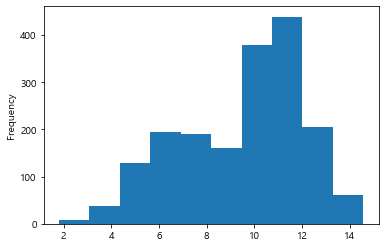

In [713]:
shorttermfrgn_final['ETC_visit_pop_cnt'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

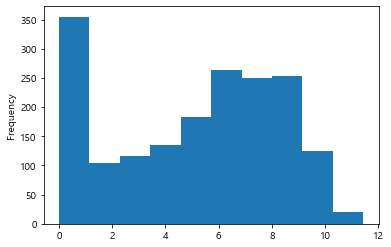

In [716]:
shorttermfrgn_final['THA_visit_pop_cnt'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

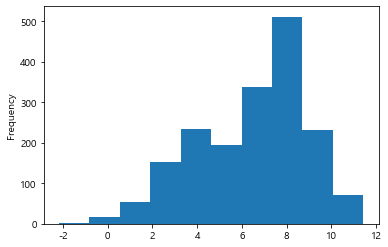

In [718]:
shorttermfrgn_final['9시_visit_pop_cnt'].plot.hist()

In [780]:
shorttermfrgn_final

,year,month,emd_nm,ETC_visit_pop_cnt,THA_visit_pop_cnt,9시_visit_pop_cnt
0,2018,1,건입동,11.212783,8.331542,8.104096
1,2018,1,구좌읍,10.632272,8.539842,7.611778
2,2018,1,남원읍,12.436764,8.208480,9.312508
3,2018,1,노형동,12.182835,8.331542,9.147770
4,2018,1,대륜동,10.657224,5.797250,7.548429
...,...,...,...,...,...,...
1801,2021,6,표선면,7.846771,3.113906,4.688973
1802,2021,6,한경면,6.599279,2.310722,3.467225
1803,2021,6,한림읍,7.473916,0.275205,4.231852
1804,2021,6,화북동,5.783455,0.000000,2.515808


In [781]:
shorttermfrgn_final['ETC_visit_pop_cnt'] = scaler.fit_transform(shorttermfrgn_final[['ETC_visit_pop_cnt']])
shorttermfrgn_final['THA_visit_pop_cnt'] = scaler.fit_transform(shorttermfrgn_final[['THA_visit_pop_cnt']])
shorttermfrgn_final['9시_visit_pop_cnt'] = scaler.fit_transform(shorttermfrgn_final[['9시_visit_pop_cnt']])

In [782]:
shorttermfrgn_final

,year,month,emd_nm,ETC_visit_pop_cnt,THA_visit_pop_cnt,9시_visit_pop_cnt
0,2018,1,건입동,0.649612,1.017769,0.667782
1,2018,1,구좌읍,0.409409,1.082986,0.466312
2,2018,1,남원읍,1.156072,0.979239,1.162295
3,2018,1,노형동,1.051001,1.017769,1.094880
4,2018,1,대륜동,0.419733,0.224307,0.440388
...,...,...,...,...,...,...
1801,2021,6,표선면,-0.743177,-0.615822,-0.729776
1802,2021,6,한경면,-1.259364,-0.867291,-1.229747
1803,2021,6,한림읍,-0.897457,-1.504591,-0.916842
1804,2021,6,화북동,-1.596936,-1.590755,-1.619092


In [783]:
shorttermfrgn_final_merge = foodwaste.merge(shorttermfrgn_final, left_on=['year', 'month', 'emd_nm'], right_on=['year', 'month', 'emd_nm'])

In [784]:
shorttermfrgn_final_merge

,year,month,emd_nm,em_g,ETC_visit_pop_cnt,THA_visit_pop_cnt,9시_visit_pop_cnt
0,2018,1,건입동,0.064537,0.649612,1.017769,0.667782
1,2018,1,남원읍,-0.011915,1.156072,0.979239,1.162295
2,2018,1,노형동,1.909326,1.051001,1.017769,1.094880
3,2018,1,대륜동,0.308722,0.419733,0.224307,0.440388
4,2018,1,대정읍,-0.103599,0.318658,1.215134,0.302529
...,...,...,...,...,...,...,...
1629,2021,6,표선면,-0.011518,-0.743177,-0.615822,-0.729776
1630,2021,6,한경면,-0.483871,-1.259364,-0.867291,-1.229747
1631,2021,6,한림읍,0.688454,-0.897457,-1.504591,-0.916842
1632,2021,6,화북동,0.994181,-1.596936,-1.590755,-1.619092


In [795]:
shorttermfrgn_final_x = shorttermfrgn_final_merge.loc[:,['ETC_visit_pop_cnt', 'THA_visit_pop_cnt', '9시_visit_pop_cnt']]
shorttermfrgn_final_y = shorttermfrgn_final_merge.loc[:,['em_g']]

In [796]:
shorttermfrgn_final_x = sm.add_constant(shorttermfrgn_final_x)

In [797]:
model = sm.OLS(shorttermfrgn_final_y, shorttermfrgn_final_x)

In [798]:
result = model.fit()

In [799]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   em_g   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     69.00
Date:                Thu, 26 Aug 2021   Prob (F-statistic):           5.25e-42
Time:                        17:50:02   Log-Likelihood:                -2071.4
No. Observations:                1634   AIC:                             4151.
Df Residuals:                    1630   BIC:                             4172.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0377      0.021      1.763      0.078      -0.004       0.080
ETC_visit_pop_cnt    -1.4461      0.278     -5.199      0.000      -1.992      -0.901
THA_visit_pop_cnt    -0.6478      0.047    -13.648      0.000      -0.741      -0.555
9시_visit_pop_cnt      2.0688      0.285      7.257      0.000       1.510       2.628
==============================================================================
Omnibus:                       47.674   Durbin-Watson:                   2.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.116
Skew:                          -0.371   Prob(JB):                     1.08e-12
Kurtosis:                       3.510   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [834]:
#제출파일 확인 df = pd.read_csv("shorttermfrgn_submit.csv", encoding='cp949')

In [835]:
#df

,year,month,emd_nm,ETC_visit_pop_cnt,THA_visit_pop_cnt
0,2018,1,건입동,74071.2620,4151.8176
1,2018,1,구좌읍,41451.2141,5113.5373
2,2018,1,남원읍,251894.2020,3670.9579
3,2018,1,노형동,195406.1223,4151.8177
4,2018,1,대륜동,42498.4839,328.3924
...,...,...,...,...,...
1801,2021,6,표선면,2557.4620,21.5088
1802,2021,6,한경면,734.5653,9.0817
1803,2021,6,한림읍,1761.4904,0.3168
1804,2021,6,화북동,324.8798,0.0000
